# Avaliando o melhor modelo de regressão

**Prevendo valores de imóveis** 📈

Na aula de hoje, vamos explorar um dataset que contém algumas características sobre imóveis, tais como area, andar, suites, vista, e entre outros atributos.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algortimo preditivo que utilize essas características para predizer o valor do imóvel, será que é possível?

**Atributos:**

* Ordem: Coluna de ID.
* Valor: Valor do imóvel.
* Area: Tamanho da área do imóvel.
* IA: Idade do imóvel.
* Andar: Quantidade de andares.
* Suites: Quantidade de suítes.
* Vista: Se o imóvel possúi uma boa vista ou não.
* DistBM: Distancia do Imovel do Mar.
* SemRuido: Se o imóvel é localizado em uma região calma ou não.
* AV100m: DistPróximo à área verde.

Vamos começar a trabalhar com os dados!

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
url = 'data\Valorizacao_Ambiental.csv'

df_imoveis = pd.read_csv(url, sep=';')

df_imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [62]:
df_imoveis.shape

(172, 10)

In [63]:
df_imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [64]:
df_imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Agora iremos entender um pouquinho sobre a nossa variável target.

Text(0.5, 1.0, 'Histograma da variável valor')

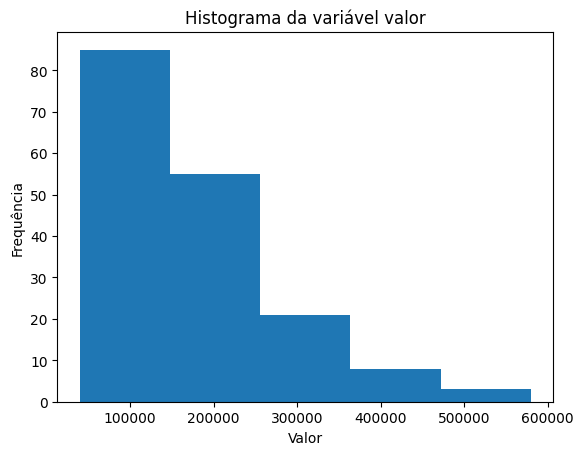

In [65]:
plt.hist(df_imoveis['Valor'], bins=5)

plt.ylabel("Frequência")
plt.xlabel("Valor")
plt.title("Histograma da variável valor")

In [66]:
df_imoveis['raiz_valor'] = np.sqrt(df_imoveis['Valor'])

df_imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


Text(0.5, 1.0, 'Histograma da variável valor após raiz quadrada aplicada')

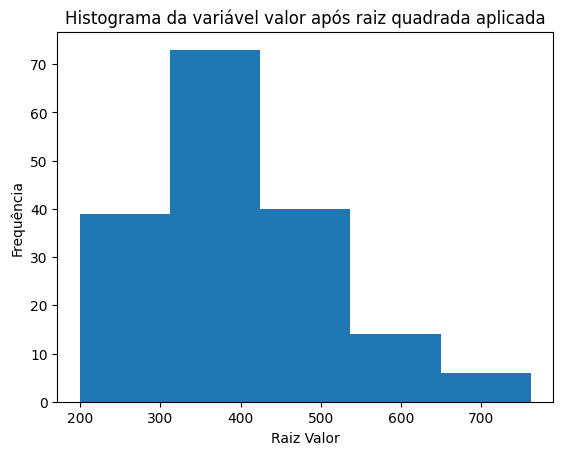

In [67]:
plt.hist(df_imoveis['raiz_valor'], bins=5)

plt.ylabel("Frequência")
plt.xlabel("Raiz Valor")
plt.title("Histograma da variável valor após raiz quadrada aplicada")

Agora iremos explorar nossas variáveis de características, e podermos ver quais serão viaveis para colocar no nosso modelo.

Text(0, 0.5, 'Se tem Suites')

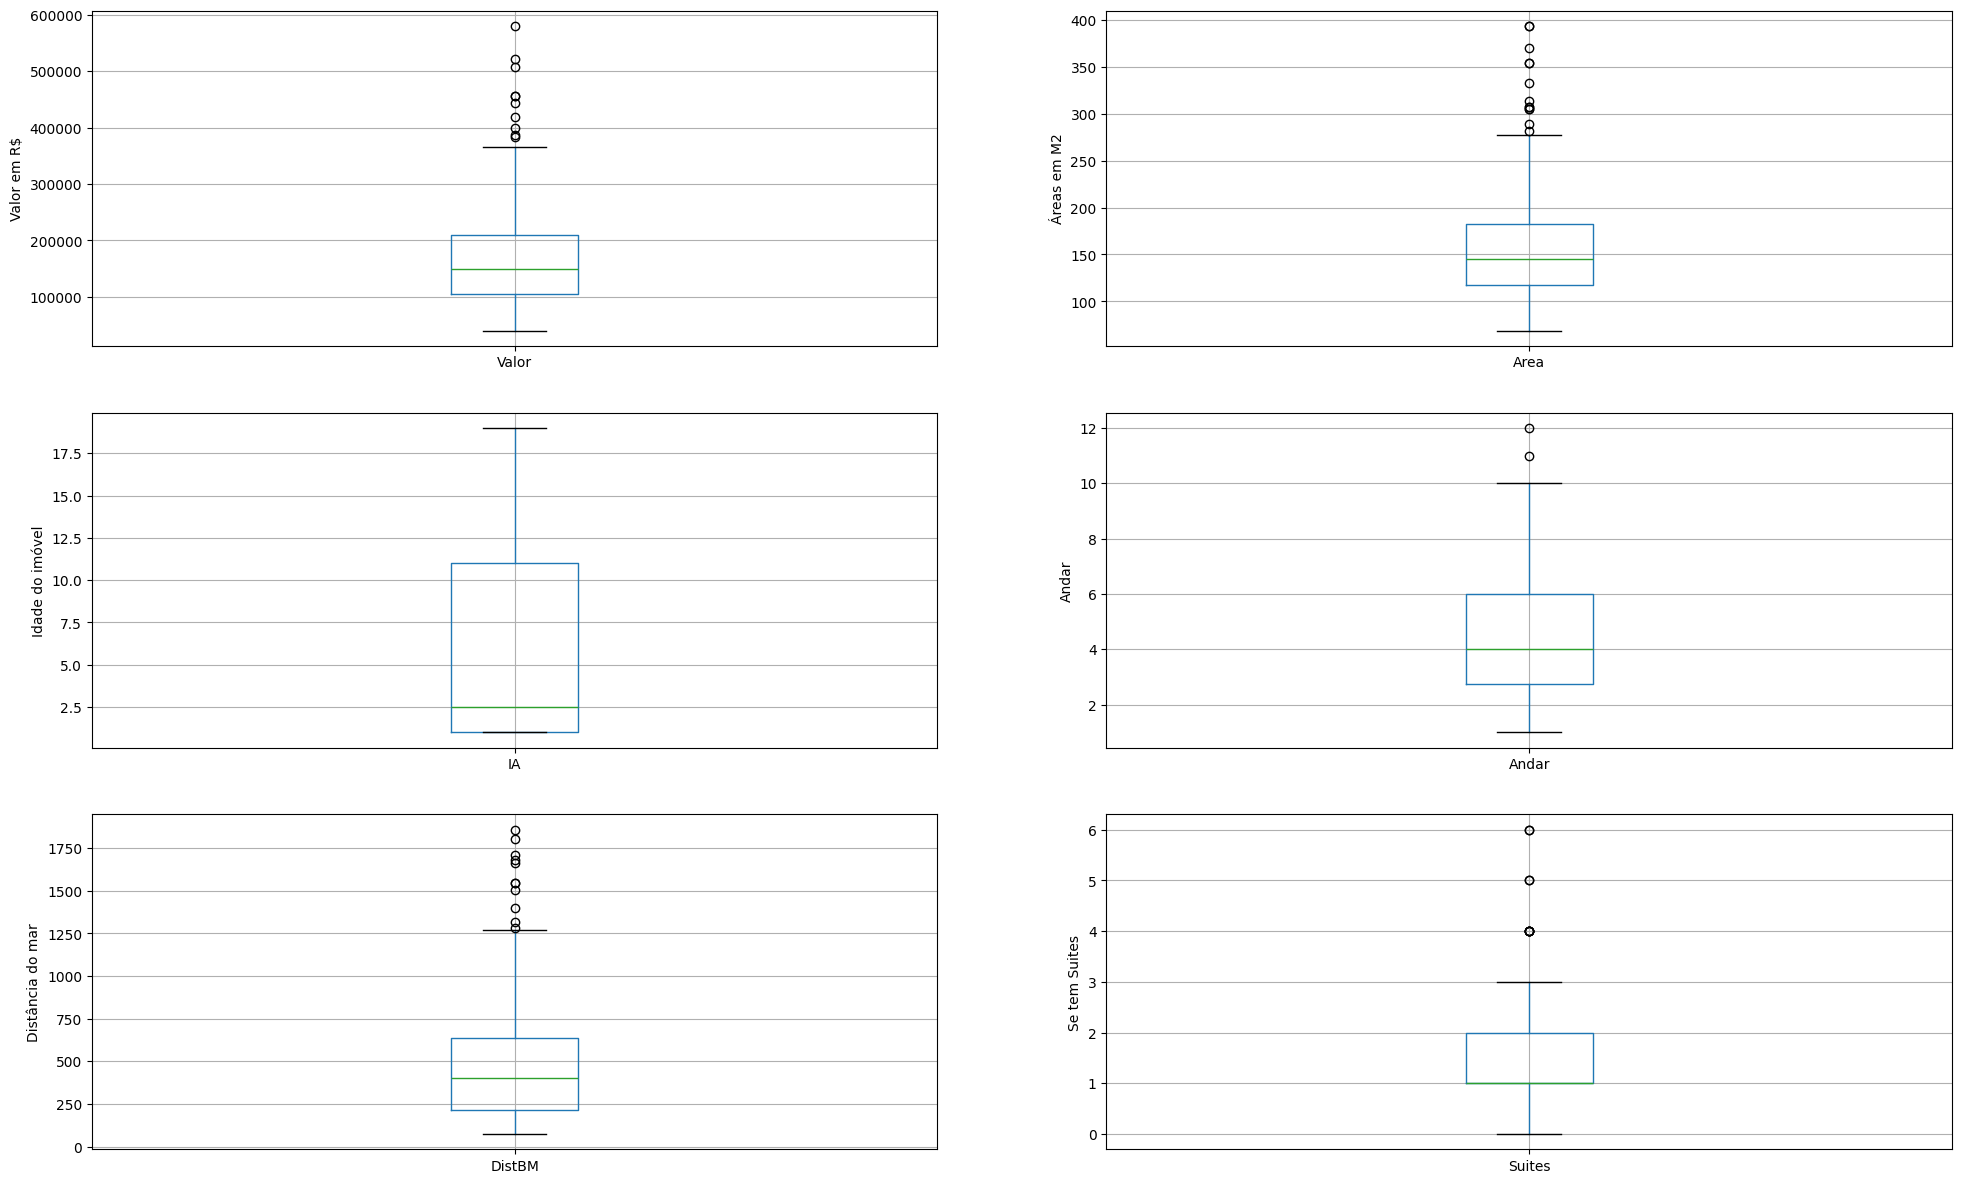

In [68]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = df_imoveis.boxplot(column= 'Valor')
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4,2,2)
fig = df_imoveis.boxplot(column= 'Area')
fig.set_title("")
fig.set_ylabel("Áreas em M2")

plt.subplot(4,2,3)
fig = df_imoveis.boxplot(column= 'IA')
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4,2,4)
fig = df_imoveis.boxplot(column= 'Andar')
fig.set_title("")
fig.set_ylabel("Andar")

plt.subplot(4,2,5)
fig = df_imoveis.boxplot(column= 'DistBM')
fig.set_title("")
fig.set_ylabel("Distância do mar")

plt.subplot(4,2,6)
fig = df_imoveis.boxplot(column= 'Suites')
fig.set_title("")
fig.set_ylabel("Se tem Suites")


Agora iremos entender um pouco sobre a correlação das nossas variáveis com a nossa target.

<Axes: >

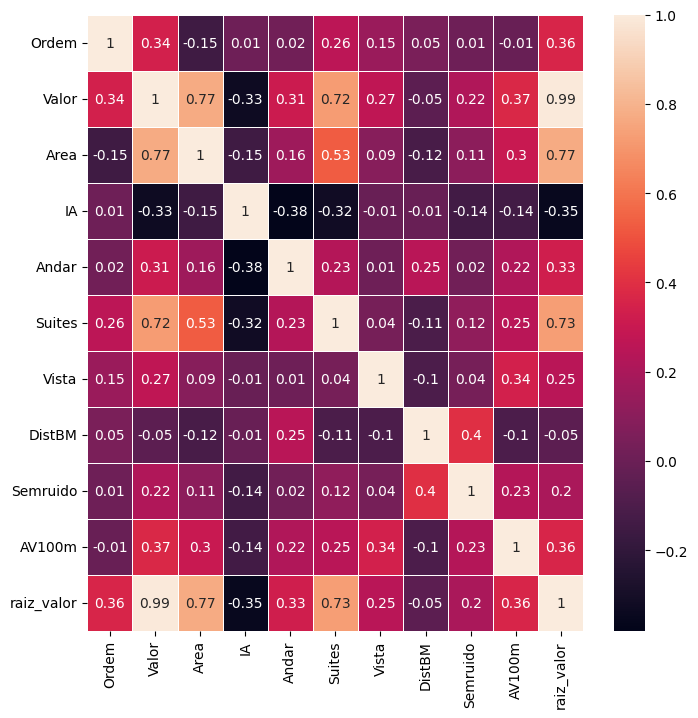

In [69]:
correletion_matriz = df_imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correletion_matriz, annot=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'A área do ímovel X Valor')

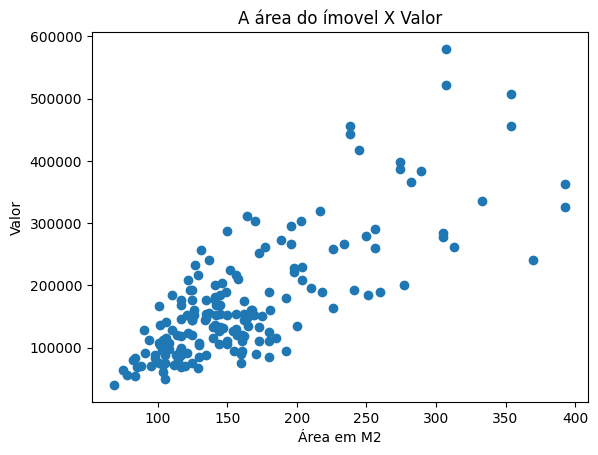

In [70]:
plt.scatter('Area','Valor', data=df_imoveis)
plt.xlabel("Área em M2")
plt.ylabel("Valor")
plt.title("A área do ímovel X Valor")

Text(0.5, 1.0, 'A idade do ímovel X Valor')

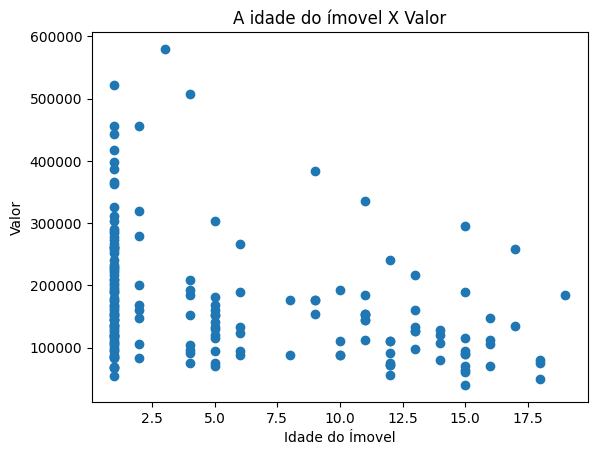

In [71]:
plt.scatter('IA','Valor', data=df_imoveis)
plt.xlabel("Idade do Ímovel")
plt.ylabel("Valor")
plt.title("A idade do ímovel X Valor")

In [72]:
df_imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


Agora iremos analisar as nossas variáveis qualitativa.

C:\Users\icors\AppData\Local\Temp\ipykernel_63092\1215234862.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vista', y='Valor', data=df_imoveis, palette=['#FF69B4'])
C:\Users\icors\AppData\Local\Temp\ipykernel_63092\1215234862.py:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Vista', y='Valor', data=df_imoveis, palette=['#FF69B4'])


<Axes: xlabel='Vista', ylabel='Valor'>

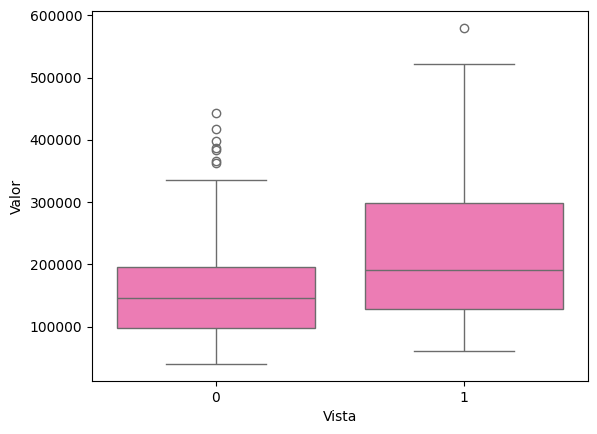

In [73]:
sns.boxplot(x='Vista', y='Valor', data=df_imoveis, palette=['#FF69B4'])

C:\Users\icors\AppData\Local\Temp\ipykernel_63092\185515229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Semruido', y='Valor', data=df_imoveis, palette=['#FF69B4'])
C:\Users\icors\AppData\Local\Temp\ipykernel_63092\185515229.py:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Semruido', y='Valor', data=df_imoveis, palette=['#FF69B4'])


<Axes: xlabel='Semruido', ylabel='Valor'>

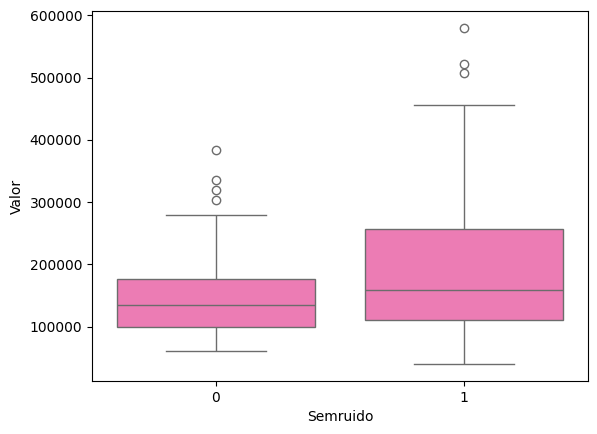

In [74]:
sns.boxplot(x='Semruido', y='Valor', data=df_imoveis, palette=['#FF69B4'])

C:\Users\icors\AppData\Local\Temp\ipykernel_63092\2413701643.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AV100m', y='Valor', data=df_imoveis, palette=['#FF69B4'])
C:\Users\icors\AppData\Local\Temp\ipykernel_63092\2413701643.py:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='AV100m', y='Valor', data=df_imoveis, palette=['#FF69B4'])


<Axes: xlabel='AV100m', ylabel='Valor'>

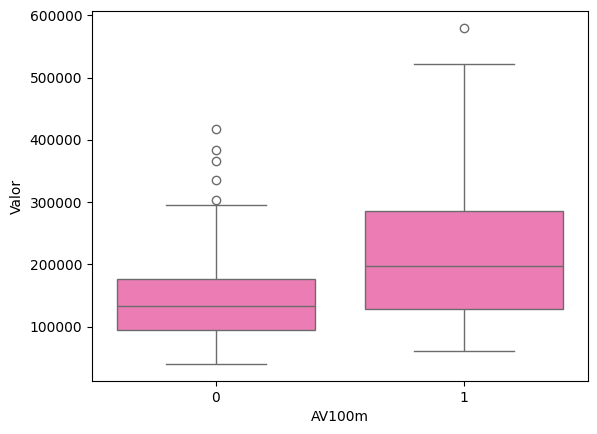

In [75]:
sns.boxplot(x='AV100m', y='Valor', data=df_imoveis, palette=['#FF69B4'])

## Modelos de regressão

In [76]:
df_imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [78]:
Lr = LinearRegression()

In [79]:
X = df_imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

Y = df_imoveis[['Valor']]

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=101)

In [82]:
Lr.fit(x_train, y_train)

LinearRegression()

In [83]:
y_pred = Lr.predict(x_test)

In [84]:
print("Intercepto: ", Lr.intercept_)

Intercepto:  [-40165.8752773]


O coeficiente representa a inclinação das nossas retas referente as nossas variáveis

In [86]:
coeficientes = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(Lr.coef_))], axis=1)
coeficientes

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


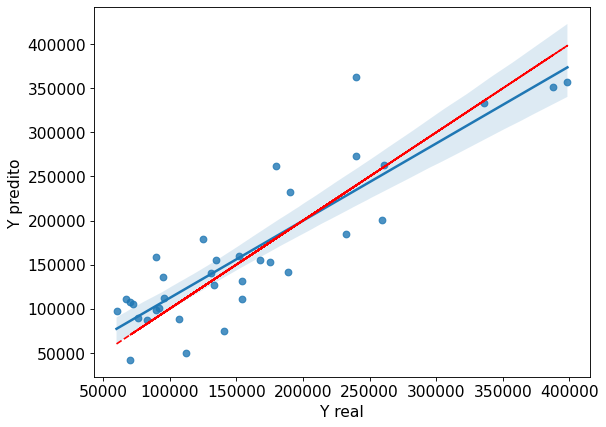

In [87]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x= y_test, y= y_pred)
ax.set(xlabel="Y real", ylabel="Y predito")
ax = plt.plot(y_test, y_test, '--r')
plt.show()

## Testes de modelos de regressão

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("R2: ", R2)

MAE:  34422.98857094557
MSE:  1844288772.178987
R2:  0.7584591969125033


## Modelo DeciosionTreeRegressor

O DecisionTreeRegressor é um modelo de árvore de decisão, utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [92]:
y_pred_dtr = model_dtr.predict(x_test)

In [93]:
MAE = mean_absolute_error(y_test, y_pred_dtr)
MSE = mean_squared_error(y_test, y_pred_dtr)
R2 = r2_score(y_test, y_pred_dtr)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("R2: ", R2)

MAE:  44913.75102040816
MSE:  3223969337.3848395
R2:  0.577766695417574


## Modelo SVR

O SVR (Support Vector Regression) busca encontrar uma função que se aproxime dos dados, mas permitindo um pequeno erro (chamado ε-tolerância). 

In [94]:
from sklearn.svm import SVR

In [96]:
srv = SVR(kernel='linear')

In [97]:
srv.fit(x_train,y_train)

c:\Users\icors\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [98]:
y_pred_svr = srv.predict(x_test)

In [99]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
R2 = r2_score(y_test, y_pred_svr)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("R2: ", R2)

MAE:  43153.53918496288
MSE:  3123421996.7782364
R2:  0.5909350700044546
